In [197]:
import numpy as np
from numpy import savetxt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display
import librosa
import librosa.display
import sys
#np.set_printoptions(threshold=sys.maxsize)

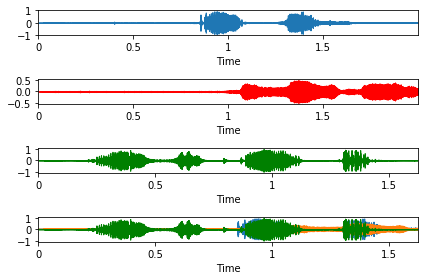

In [198]:

template_wav, template_wav_sr = librosa.load('record01.wav')
input_wav, input_sr = librosa.load('Nellie1.wav')
wrong_wav, wrong_sr = librosa.load('hello_wakeup_13.wav')
#plot raw audio wav
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13.6, 7.68))
plt.subplot(4,1,1)
librosa.display.waveplot(template_wav, sr=template_wav_sr)


plt.subplot(4,1,2)
librosa.display.waveplot(input_wav, sr=input_sr, color="red")

plt.subplot(4,1,3)
librosa.display.waveplot(wrong_wav, sr=wrong_sr, color="green")

plt.subplot(4,1,4)
librosa.display.waveplot(template_wav, sr=template_wav_sr)
librosa.display.waveplot(input_wav, sr=input_sr,)
librosa.display.waveplot(wrong_wav, sr=wrong_sr, color="green")


plt.tight_layout()
plt.show()


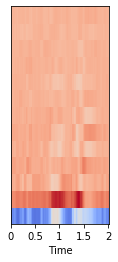

In [199]:
#compute mfcc
template_wav_mfcc = librosa.feature.mfcc(template_wav, template_wav_sr,n_mfcc=13)#.flatten()
input_wav_mfcc = librosa.feature.mfcc(input_wav, input_sr,n_mfcc=13)#.flatten()
wrong_wav_mfcc = librosa.feature.mfcc(input_wav, input_sr,n_mfcc=13)
# display the mfcc
plt.subplot(1,3,1)
librosa.display.specshow(template_wav_mfcc, sr=template_wav_sr, x_axis='time')

In [200]:
template_wav_mfcc_1D = (librosa.feature.mfcc(template_wav, template_wav_sr,n_mfcc=13))[1:13].flatten()
input_wav_mfcc_1D = (librosa.feature.mfcc(input_wav, input_sr,n_mfcc=13))[1:13].flatten()
wrong_wav_mfcc_1D = (librosa.feature.mfcc(wrong_wav, wrong_sr,n_mfcc=13))[1:13].flatten()
print("shape of template is {}".format(template_wav_mfcc_1D.shape))
print("shape of input is {}".format(input_wav_mfcc_1D.shape))
#print(template_wav_mfcc_1D.T)
m = len(template_wav_mfcc_1D)
n = len(input_wav_mfcc_1D)
print(m)
print(n)
print(template_wav_mfcc_1D[0])
print(input_wav_mfcc_1D[0])

shape of template is (1044,)
shape of input is (1044,)
1044
1044
38.990616
104.84735


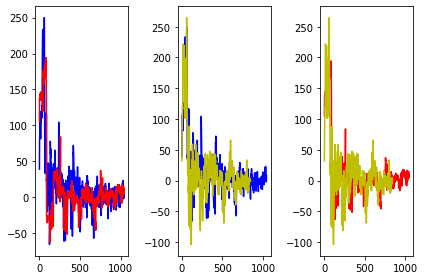

In [201]:
# plt.plot(template_signal,'r',label='template_signal')
plt.subplot(1,3,1)
plt.plot(template_wav_mfcc_1D,'b',label='template mfcc')
plt.plot(input_wav_mfcc_1D,'r',label='input mfcc')
plt.subplot(1,3,2)
plt.plot(template_wav_mfcc_1D,'b',label='template mfcc')
plt.plot(wrong_wav_mfcc_1D,'y',label='wrong mfcc')
plt.subplot(1,3,3)
plt.plot(input_wav_mfcc_1D,'r',label='input mfcc')
plt.plot(wrong_wav_mfcc_1D,'y',label='wrong mfcc')
plt.tight_layout()
plt.show()

# Mel Spectrum, MFCC, LPC

A typical spectrogram uses a linear frequency scaling, so each frequency bin is spaced the equal number of Hertz apart. The mel-frequency scale on the other hand, is a quasi-logarithmic spacing roughly resembling the resolution of the human auditory system.

This makes the MFCC features more “biologically inspired”. As far as I know such front-ends have been proven to be more successful in automatic speech recognition or speech segregation.

How MFCC is computed? First you compute the mel frequency specrogram, log it then take the discrete cosine transform. The last stage is a linear operation so can be absorbed into the first layer of the neural network. So really the main difference is whether you log the mel frequency specrogram or not (and maybe power normalise). In terms of performance, the mel filterbank is slightly ahead, but not by much. There are two philosophical advantages, firstly it is often good to get the DNN to learn complex representations and not impose them, and secondly I've always hated the log, it's quite reasonable to have no power in a frequency range, so you end up fudging things to avoid ln(0).

In [202]:
cost = np.zeros((n,m))
#print(cost)

In [210]:
for i in range(n):
    for j in range(m):
        cost[i,j] = (template_wav_mfcc_1D[j]- input_wav_mfcc_1D[i])**2
        

In [211]:
#savetxt("cost.csv",cost,",")

#part_cost = cost[0:100,0:100]
#print(part_cost)
#print(part_cost.shape)

In [212]:
def cost_plot(matrix):
    im = plt.imshow(matrix, interpolation='nearest', cmap='Reds')
    plt.gca().invert_yaxis()
    plt.xlabel("input")
    plt.ylabel("template")
    plt.grid()
    plt.colorbar()

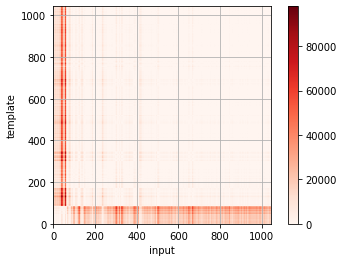

In [213]:
cost_plot(cost)

4337.109575087437


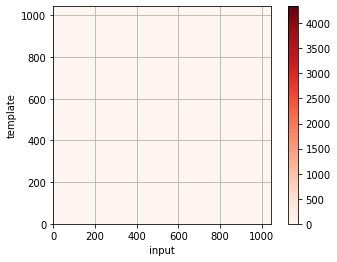

In [214]:
accumulated_cost = np.zeros((n,m))
accumulated_cost[0,0] = cost[0,0]
print(accumulated_cost[0,0])
cost_plot(accumulated_cost)

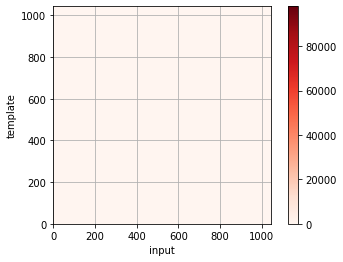

In [193]:
for idx in range(1,n):
    accumulated_cost[0,idx] = cost[0,idx] + accumulated_cost[0,idx-1]
cost_plot(accumulated_cost)